In [8]:
import cv2 as cv
import numpy as np
from IPython.display import Image, display
import math
from numpy.linalg import norm
import random
import PIL.Image
import io
import json
import pickle
def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

In [9]:
# Load centers and labeled image data
path = "camera_calibration"
with open(f"{path}/center.pkl", "rb") as in_file:
    centers = pickle.load(in_file)

with open(f"{path}/point_data.json", "rb") as in_file:
    point_data = json.load(in_file)

In [19]:
object_points = []
center_points = []

for i,p in enumerate(point_data):
    selected_points = p['points']
    if selected_points == [0]:
        continue
    center = centers[i]['centers'][selected_points]
    n_rows, n_cols = p['n_rows'], p['n_cols']
    objp = np.zeros((n_rows * n_cols, 3), np.float32)
    objp[:,:2] = np.mgrid[0:n_rows,0:n_cols].T.reshape(-1,2) * 0.3
    if len(objp) != len(center):
        continue
    object_points.append(objp)
    center_points.append(center.astype(np.float32))

image_size = (480,848)

ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(object_points, center_points, image_size, None, cv.CALIB_USE_INTRINSIC_GUESS + cv.CALIB_FIX_FOCAL_LENGTH)
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, image_size, 1, image_size)


In [20]:
objp

array([[0. , 0. , 0. ],
       [0.3, 0. , 0. ],
       [0.6, 0. , 0. ],
       [0.9, 0. , 0. ],
       [0. , 0.3, 0. ],
       [0.3, 0.3, 0. ],
       [0.6, 0.3, 0. ],
       [0.9, 0.3, 0. ],
       [0. , 0.6, 0. ],
       [0.3, 0.6, 0. ],
       [0.6, 0.6, 0. ],
       [0.9, 0.6, 0. ],
       [0. , 0.9, 0. ],
       [0.3, 0.9, 0. ],
       [0.6, 0.9, 0. ],
       [0.9, 0.9, 0. ]], dtype=float32)

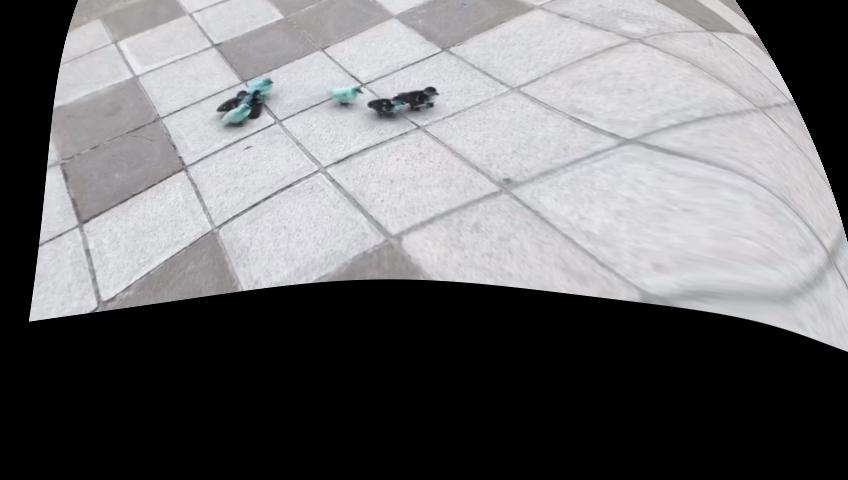

In [21]:
cap = cv.VideoCapture("patitos.mp4")
ret, frame = cap.read()
video = cv.VideoWriter('undistort.avi',cv.VideoWriter_fourcc('M','J','P','G'), 10, (848,480))
frame_count = 0
while True:
    frame_count += 1
    ret, frame = cap.read()
    #print(frame_count)
    if not ret or frame_count > 100:
        break
    dst = cv.undistort(frame, mtx, dist, None, newcameramtx)
    video.write(dst)
showarray(dst)
video.release()

In [22]:
mtx

array([[656.21492489,   0.        , 433.36419249],
       [  0.        , 634.36590008, 549.00237266],
       [  0.        ,   0.        ,   1.        ]])

In [23]:
dist

array([[  3.6314616 ],
       [-20.14867951],
       [ -0.24932133],
       [ -0.21291317],
       [ 30.16925059]])